# Comparación de alimentos de distintas marcas.
Proyecto hecho por :
* Francisco José González Ruiz
* Cristina Bellido Albañil

In [1]:
import json
import requests
import pprint
import math
import pandas as pd
from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# FASE 1: Extracción de datos.


* Inicializamos el proceso de obtención de datos a traves de la API observando el tipo de respuesta que nos otorgue el servidor en el proceso de autentificación. Aunque de forma normal el tipo de respuesta deseado es de '200', según la documentación obtener una respuesta de '403' también es viable. 

#### Link de la documentación : https://openfoodfacts.github.io/api-documentation

* Se puede acotar la zona de busqueda de los datos. Para ello no se necesita ningún filtro, si no que se aplica directamente al endpoint. 
* En el caso de España el código es "es." teniéndolo que poner en la zona correspondiente del siguiente link: 
#### https://[CÓDIGO DEL PAIS].openfoodfacts.org/marca/[MARCA DE INTERÉS].json

### Extracción de datos de las marcas que nos interesan
#### Datos de interés: 
    - Categoria
    - Nombre del producto
    - Ingredientes 
    - Alérgenos
    - Aditivos
    - Análisis de los ingredientes
    - Puntuación nutricional
    - Tipo de procesado
    - Nivel de nutrientes
    - Tabla de nutrientes
    - Sostenibilidad

In [2]:
url = "https://world.openfoodfacts.org/cgi/auth.pl"
response = requests.get(url)
print(response)

<Response [403]>


In [3]:
json_mercadona = requests.get("https://es-es.openfoodfacts.org/marca/hacendado.json/")
json_hacendado = json_mercadona.json()
pprint.pprint(json_hacendado)

{'count': 6897,
 'page': 1,
 'page_count': 24,
 'page_size': 24,
 'products': [{'_id': '8480000361264',
               '_keywords': ['arroz',
                             'botana',
                             'chocolate',
                             'con',
                             'crujiente',
                             'de',
                             'dulce',
                             'gastronomia',
                             'gluten',
                             'hacendado',
                             'inflado',
                             'navidad',
                             'navidena',
                             'negro',
                             'punto',
                             'sin',
                             'snack',
                             'turron',
                             'turrone',
                             'verde'],
               'added_countries_tags': [],
               'additives_n': 2,
               'additives_old_n': 1,

                                                                                                      'mk': 0,
                                                                                                      'mt': 0,
                                                                                                      'nl': 0,
                                                                                                      'no': 0,
                                                                                                      'pl': 0,
                                                                                                      'ps': 0,
                                                                                                      'pt': 0,
                                                                                                      'ro': 0,
                                                                                                      'rs': 0,
 

In [9]:
lista_marca=list()
def extraer_alimentos():
    marcas=input("Dime una lista de marcas separadas por coma y sin espacio:",).split(",")
    for marca in marcas:
        lista_de_paginas=list()
        json_marca = requests.get(f"https://es-es.openfoodfacts.org/marca/{marca}.json/")
        json_marca2 = json_marca.json()
        for p in range(math.ceil(json_marca2["count"]/json_marca2["page_size"])+1):
            lista_de_paginas.append(f"https://es-es.openfoodfacts.org/marca/{marca}.json/{p}")
        for l in lista_de_paginas[1:]:
            print(l)
            sleep(2)
            json_marca = requests.get(f"{l}")
            json_marca2 = json_marca.json()
            for n in range(json_marca2["page_count"]):
                #MARCA
                marca_=marca
                #CATEGORIA
                try:
                    categoria = json_marca2["products"][n]["categories"]
                except:
                    categoria =None
                #NOMBRE
                try:
                    nombre = json_marca2["products"][n]["product_name_es"]
                except:
                    nombre =None
                #INGREDIENTES
                try:
                    ingredientes = json_marca2["products"][n]["ingredients_text_es"]
                except:
                    ingredientes =None
                #ALERGENEOS
                try:
                    alergenos = json_marca2["products"][n]["allergens_from_ingredients"]
                except:
                    alergenos =None
                #ANALISIS INGREDIENTES
                try:
                    analisisingredientes = json_marca2["products"][n]['ingredients_analysis_tags']
                except:
                    analisisingredientes = None
                try:
                    if analisisingredientes[0]== "en:palm-oil-free":
                        aceitedepalma=True
                    elif analisisingredientes[0]== "en:palm-oil-content-unknown":
                        aceitedepalma= False
                    else:
                        aceitedepalma="Información Insuficiente"
                except:
                    aceitedepalma=None
                try:
                    if analisisingredientes[1]== "en:vegan":
                        vegano= True
                    elif analisisingredientes[1] == "en:vegan-status-unknown":
                        vegano= "Información Insuficiente"
                    else:
                        vegano = False
                except:
                    vegano=None
                try:
                    if analisisingredientes[2]== "en:vegetarian":
                        vegetariano= True
                    elif analisisingredientes[2]== "vegetarian-status-unknown":
                        vegetariano = "Información Insuficiente"
                    else:
                        vegetariano= False
                except:
                    vegetariano=None
                #CATEGORIA NUTRICIONAL
                try:
                    categoria_nutricional = json_marca2["products"][n]["nutriscore_data"]["grade"]
                except:
                    categoria_nutricional =None
                #TIPO DE PROCESADO
                try:
                    tipo_procesado= json_marca2["products"][n]["nova_group"]
                except:
                    tipo_procesado=None
                #CARBOHIDRATOS
                try:
                    carbohidratos = json_marca2["products"][n]["nutriments"]["carbohydrates_100g"]
                except:
                    carbohidratos =None
                #KILOCALORIAS
                try:
                    energy_kcal = json_marca2["products"][n]["nutriments"]["energy-kcal_100g"]
                except:
                    energy_kcal =None
                #GRASAS
                try:
                    grasas = json_marca2["products"][n]["nutriments"]["fat_100g"]
                except:
                    grasas =None
                #FIBRA
                try:
                    fibra =json_marca2["products"][n]["nutriments"]["fiber_100g"]
                except:
                    fibra =None
                #CONTENIDO EN FRUTA
                try:
                    fruits_vegetables_nuts_estimate_g = json_marca2["products"][n]["nutriments"]["fruits-vegetables-nuts-estimate-from-ingredients_100g"]
                except:
                    fruits_vegetables_nuts_estimate_g = None
                #GRASA MONOSATURADA
                try:
                    grasa_monosaturada = json_marca2["products"][n]["nutriments"]["monounsaturated-fat_100g"]
                except:
                    grasa_monosaturada =None
                #GRASA POLISATURADA
                try:
                    grasa_polinsaturada =json_marca2["products"][n]["nutriments"]["polyunsaturated-fat_100g"]
                except:
                    grasa_polinsaturada =None
                #PROTEINA
                try:
                    proteinas = json_marca2["products"][n]["nutriments"]["proteins_100g"]
                except:
                    proteinas =None
                #SAL
                try:
                    salt= json_marca2["products"][n]["nutriments"]["salt_100g"]
                except:
                    salt=None
                #GRASAS SATURADAS
                try:
                    grasas_saturadas =json_marca2["products"][n]["nutriments"]["saturated-fat_100g"]
                except:
                    grasas_saturadas =None
                #SODIO
                try:
                    sodio = json_marca2["products"][n]["nutriments"]["sodium_100g"]
                except:
                    sodio =None
                #AZUCARES
                try:
                    azucares = json_marca2["products"][n]["nutriments"]["sugars_100g"]
                except:
                    azucares =None
                #ADITIVOS
                try:
                    aditivos = json_marca2["products"][n]["additives_original_tags"]
                except:
                    aditivos =None
                #ECOSCORE
                try:
                    ecoscore = json_marca2["products"][n]["ecoscore_data"]["grade"]
                except:
                    ecoscore =None
                lista_marca.append([marca_, categoria, nombre, ingredientes, alergenos, aditivos, aceitedepalma, vegetariano, vegano, categoria_nutricional, tipo_procesado, ecoscore, energy_kcal, carbohidratos, grasas, grasas_saturadas, grasa_monosaturada, grasa_polinsaturada, proteinas, azucares, sodio, salt, fruits_vegetables_nuts_estimate_g, fibra])
    dataframe_Marca = pd.DataFrame(data = lista_marca, columns = ["marca","categoria", "nombre", "ingredientes", "alergenos", "aditivos", "aceitedepalma", "vegetariano", "vegano", "categoria_nutricional", "tipo_procesado", "ecoscore", "energy_kcal(kcal)", "carbohidratos(g)", "grasas(g)", "grasas_saturadas(g)", "grasa_monosaturada(g)"," grasa_polinsaturada(g)", "proteinas(g)", "azucares(g)", "sodio(g)", "salt(g)","fruits_vegetables_nuts_estimate_g(g)", "fibra(g)"])
    return dataframe_Marca

In [10]:
#Para extraer el dataframe final tenemos que crear una variable y ponerle nombre llamando a la función.
df = extraer_alimentos()


Dime una lista de marcas separadas por coma y sin espacio:hacendado,carrefour,alteza
https://es-es.openfoodfacts.org/marca/hacendado.json/1
https://es-es.openfoodfacts.org/marca/hacendado.json/2
https://es-es.openfoodfacts.org/marca/hacendado.json/3
https://es-es.openfoodfacts.org/marca/hacendado.json/4
https://es-es.openfoodfacts.org/marca/hacendado.json/5
https://es-es.openfoodfacts.org/marca/hacendado.json/6
https://es-es.openfoodfacts.org/marca/hacendado.json/7
https://es-es.openfoodfacts.org/marca/hacendado.json/8
https://es-es.openfoodfacts.org/marca/hacendado.json/9
https://es-es.openfoodfacts.org/marca/hacendado.json/10
https://es-es.openfoodfacts.org/marca/hacendado.json/11
https://es-es.openfoodfacts.org/marca/hacendado.json/12
https://es-es.openfoodfacts.org/marca/hacendado.json/13
https://es-es.openfoodfacts.org/marca/hacendado.json/14
https://es-es.openfoodfacts.org/marca/hacendado.json/15
https://es-es.openfoodfacts.org/marca/hacendado.json/16
https://es-es.openfoodfacts.

https://es-es.openfoodfacts.org/marca/hacendado.json/146
https://es-es.openfoodfacts.org/marca/hacendado.json/147
https://es-es.openfoodfacts.org/marca/hacendado.json/148
https://es-es.openfoodfacts.org/marca/hacendado.json/149
https://es-es.openfoodfacts.org/marca/hacendado.json/150
https://es-es.openfoodfacts.org/marca/hacendado.json/151
https://es-es.openfoodfacts.org/marca/hacendado.json/152
https://es-es.openfoodfacts.org/marca/hacendado.json/153
https://es-es.openfoodfacts.org/marca/hacendado.json/154
https://es-es.openfoodfacts.org/marca/hacendado.json/155
https://es-es.openfoodfacts.org/marca/hacendado.json/156
https://es-es.openfoodfacts.org/marca/hacendado.json/157
https://es-es.openfoodfacts.org/marca/hacendado.json/158
https://es-es.openfoodfacts.org/marca/hacendado.json/159
https://es-es.openfoodfacts.org/marca/hacendado.json/160
https://es-es.openfoodfacts.org/marca/hacendado.json/161
https://es-es.openfoodfacts.org/marca/hacendado.json/162
https://es-es.openfoodfacts.org

https://es-es.openfoodfacts.org/marca/carrefour.json/2
https://es-es.openfoodfacts.org/marca/carrefour.json/3
https://es-es.openfoodfacts.org/marca/carrefour.json/4
https://es-es.openfoodfacts.org/marca/carrefour.json/5
https://es-es.openfoodfacts.org/marca/carrefour.json/6
https://es-es.openfoodfacts.org/marca/carrefour.json/7
https://es-es.openfoodfacts.org/marca/carrefour.json/8
https://es-es.openfoodfacts.org/marca/carrefour.json/9
https://es-es.openfoodfacts.org/marca/carrefour.json/10
https://es-es.openfoodfacts.org/marca/carrefour.json/11
https://es-es.openfoodfacts.org/marca/carrefour.json/12
https://es-es.openfoodfacts.org/marca/carrefour.json/13
https://es-es.openfoodfacts.org/marca/carrefour.json/14
https://es-es.openfoodfacts.org/marca/carrefour.json/15
https://es-es.openfoodfacts.org/marca/carrefour.json/16
https://es-es.openfoodfacts.org/marca/carrefour.json/17
https://es-es.openfoodfacts.org/marca/carrefour.json/18
https://es-es.openfoodfacts.org/marca/carrefour.json/19


https://es-es.openfoodfacts.org/marca/carrefour.json/148
https://es-es.openfoodfacts.org/marca/carrefour.json/149
https://es-es.openfoodfacts.org/marca/carrefour.json/150
https://es-es.openfoodfacts.org/marca/carrefour.json/151
https://es-es.openfoodfacts.org/marca/carrefour.json/152
https://es-es.openfoodfacts.org/marca/carrefour.json/153
https://es-es.openfoodfacts.org/marca/carrefour.json/154
https://es-es.openfoodfacts.org/marca/carrefour.json/155
https://es-es.openfoodfacts.org/marca/carrefour.json/156
https://es-es.openfoodfacts.org/marca/carrefour.json/157
https://es-es.openfoodfacts.org/marca/carrefour.json/158
https://es-es.openfoodfacts.org/marca/carrefour.json/159
https://es-es.openfoodfacts.org/marca/carrefour.json/160
https://es-es.openfoodfacts.org/marca/carrefour.json/161
https://es-es.openfoodfacts.org/marca/carrefour.json/162
https://es-es.openfoodfacts.org/marca/carrefour.json/163
https://es-es.openfoodfacts.org/marca/carrefour.json/164
https://es-es.openfoodfacts.org

https://es-es.openfoodfacts.org/marca/alteza.json/25
https://es-es.openfoodfacts.org/marca/alteza.json/26
https://es-es.openfoodfacts.org/marca/alteza.json/27
https://es-es.openfoodfacts.org/marca/alteza.json/28
https://es-es.openfoodfacts.org/marca/alteza.json/29
https://es-es.openfoodfacts.org/marca/alteza.json/30
https://es-es.openfoodfacts.org/marca/alteza.json/31
https://es-es.openfoodfacts.org/marca/alteza.json/32
https://es-es.openfoodfacts.org/marca/alteza.json/33
https://es-es.openfoodfacts.org/marca/alteza.json/34
https://es-es.openfoodfacts.org/marca/alteza.json/35
https://es-es.openfoodfacts.org/marca/alteza.json/36
https://es-es.openfoodfacts.org/marca/alteza.json/37
https://es-es.openfoodfacts.org/marca/alteza.json/38
https://es-es.openfoodfacts.org/marca/alteza.json/39
https://es-es.openfoodfacts.org/marca/alteza.json/40
https://es-es.openfoodfacts.org/marca/alteza.json/41
https://es-es.openfoodfacts.org/marca/alteza.json/42
https://es-es.openfoodfacts.org/marca/alteza.j

In [11]:
##Asi quedaría el Dataframe
df

marca                                          categoria  \
0      hacendado  Alimentos y bebidas de origen vegetal, Aliment...   
1      hacendado  Botanas, Snacks dulces, Dulces, Gastronomía na...   
2      hacendado  Prepared meats,fr:Charcuteries cuites,Cooked p...   
3      hacendado                                    en:grana-padano   
4      hacendado  Prepared meats,fr:Charcuteries cuites,Cooked p...   
...          ...                                                ...   
15011     alteza  Botanas, Snacks dulces, Barritas, Barritas de ...   
15012     alteza  Lácteos, Comidas fermentadas, Productos fermen...   
15013     alteza  Snacks, Sweet snacks, Cocoa and its products, ...   
15014     alteza  Untables, Desayunos, Productos apícolas, Produ...   
15015     alteza  Botanas, Snacks dulces, en:Cocoa and its produ...   

                                     nombre  \
0                         Almendra crocanti   
1       Turrón de chocolate negro crujiente   
2      Pechuga pollo braseada finas lonchas   
3                    Grana Padamo en lascas   
4            Pechuga de pollo finas lonchas   
...                                     ...   
15011     Barrita de cereales con chocolate   
15012                          Queso alteza   
15013                                  None   
15014                     Miel de Milflores   
15015                                 Negro   

                                            ingredientes  \
0      ALMENDRA (50%) y azúcar (50%). TRAZAS DE CACAH...   
1      Azúcar, pasta de cacao, cereales crujientes 12...   
2      Pechuga de pollo (70 % ), agua, sal, dextrosa,...   
3                                                   None   
4      Pechuga de pollo (70%), agua, sal, dextrosa, a...   
...                                                  ...   
15011  Cereales (41 %) [copos de avena, harina de tri...   
15012                                                      
15013                                               None   
15014                                                      
15015  Pasta de cacao, azúcar, manteca de cacao, caca...   

                                               alergenos  \
0                            en:nuts, ALMENDRA, ALMENDRA   
1                            en:nuts, hazelnuts, almonds   
2                                            en:soybeans   
3                                                          
4                                      en:soybeans, soja   
...                                                  ...   
15011  en:gluten, Cereales, harina de trigo, cacahuet...   
15012                                                      
15013                                                      
15014                                                      
15015                                        en:soybeans   

                                    aditivos             aceitedepalma  \
0                                         []                     False   
1                        [en:e322i, en:e476]                      True   
2                        [en:e451i, en:e407]                      True   
3                                       None                      None   
4      [en:e451i, en:e407, en:e301, en:e250]                      True   
...                                      ...                       ...   
15011           [en:e322i, en:e420, en:e473]  Información Insuficiente   
15012                                     []                      None   
15013                                     []                      None   
15014                                     []                      None   
15015                             [en:e322i]                      True   

      vegetariano                    vegano categoria_nutricional  ...  \
0           False  Información Insuficiente                     d  ...   
1           False  Información Insuficiente                     e  ...   
2           False                     Fa

# Fase 2. Transformación

In [12]:
df.isna().sum()

marca                                       0
categoria                                2954
nombre                                    363
ingredientes                             3759
alergenos                                   0
aditivos                                 2194
aceitedepalma                            7808
vegetariano                              7828
vegano                                   7811
categoria_nutricional                    6302
tipo_procesado                           8206
ecoscore                                 8514
energy_kcal(kcal)                        1945
carbohidratos(g)                         1825
grasas(g)                                1878
grasas_saturadas(g)                      1897
grasa_monosaturada(g)                   14738
 grasa_polinsaturada(g)                 14741
proteinas(g)                             1834
azucares(g)                              1828
sodio(g)                                 2049
salt(g)                           

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15016 entries, 0 to 15015
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   marca                                 15016 non-null  object 
 1   categoria                             12062 non-null  object 
 2   nombre                                14653 non-null  object 
 3   ingredientes                          11257 non-null  object 
 4   alergenos                             15016 non-null  object 
 5   aditivos                              12822 non-null  object 
 6   aceitedepalma                         7208 non-null   object 
 7   vegetariano                           7188 non-null   object 
 8   vegano                                7205 non-null   object 
 9   categoria_nutricional                 8714 non-null   object 
 10  tipo_procesado                        6810 non-null   float64
 11  ecoscore       

In [14]:
#Hay artículos que no poseen nombre, por lo tanto imposibilita su identificación
def quitar_sinnombre(dataframe):
    dataframe = dataframe.dropna(subset = ["nombre"])
    return dataframe


In [15]:
df = quitar_sinnombre(df)

In [16]:
#Por si en un futuro queremos realizar un .explode(), crearemos una columna "id" para identificar el producto.
def crear_id(dataframe):
    dataframe["id"] = [i for i in range(dataframe.shape[0])]
    return dataframe

In [17]:
df = crear_id(df)

C:\Users\Fgonz\AppData\Local\Temp\ipykernel_15320\3728530384.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["id"] = [i for i in range(dataframe.shape[0])]


In [18]:
#Debido a que el tipo de procesado te lo da en valor númerico, para categorizarlo mejor, creamos una función...
#...utilizando un diccionario para el cambio.
def optimizar_procesado(dataframe):
    dataframe['tipo_procesado']= dataframe['tipo_procesado'].astype(object)
    dicc_procesado={1.0:"Alimentos no procesados o minimamente procesados",
                    2.0:"Ingredientes culinarios procesados",
                    3.0:"Alimentos procesados",
                    4.0:"Alimentos ultraprocesados"}
    dataframe=dataframe.replace({"tipo_procesado": dicc_procesado})
    return dataframe

In [19]:
df = optimizar_procesado(df)

C:\Users\Fgonz\AppData\Local\Temp\ipykernel_15320\3752979548.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['tipo_procesado']= dataframe['tipo_procesado'].astype(object)


In [20]:
def func_explode(dataframe):
    dataframe["categoria"] = dataframe["categoria"].apply(lambda x : [i.strip() for i in x.split(",")] if x != None else x)
    dataframe = dataframe.explode(["categoria"])
    dataframe = dataframe.explode(["aditivos"])
    return dataframe

In [21]:
df = func_explode(df)

In [24]:
df["categoria"].unique()

array(['Alimentos y bebidas de origen vegetal',
       'Alimentos de origen vegetal', 'Frutas y verduras y sus productos',
       ..., 'Galletas-de-tipo-digestive', 'Lecitina de soja',
       'en:Assorted chocolate candies'], dtype=object)

In [25]:
df["aditivos"].unique()

array([nan, 'en:e322i', 'en:e476', 'en:e451i', 'en:e407', None, 'en:e301',
       'en:e250', 'en:e14xx', 'en:e331', 'en:e950', 'en:e955', 'en:e260',
       'en:e223', 'en:e401', 'en:e621', 'en:e330', 'en:e270', 'en:e300',
       'en:e202', 'en:e952', 'en:e282', 'en:e200', 'en:e481', 'en:e471',
       'en:e412', 'en:e428', 'en:e422', 'en:e296', 'en:e325', 'en:e904',
       'en:e901', 'en:e120', 'en:e410', 'en:e420', 'en:e326', 'en:e316',
       'en:e418', 'en:e101i', 'en:e570', 'en:e417', 'en:e461', 'en:e440',
       'en:e160b', 'en:e460', 'en:e466', 'en:e953', 'en:e306', 'en:e967',
       'en:e414', 'en:e171', 'en:e553b', 'en:e951', 'en:e211', 'en:e385',
       'en:e415', 'en:e500ii', 'en:e339ii', 'en:e451', 'en:e160ai',
       'en:e150d', 'en:e338', 'en:e163', 'en:e160a', 'en:e160c',
       'en:e150a', 'en:e101', 'en:e142', 'en:e500', 'en:e501', 'en:e635',
       'en:e150c', 'en:e322', 'en:e331i', 'en:e445', 'en:e133', 'en:e252',
       'en:e150', 'en:e1420', 'en:e450i', 'en:e331iii',

In [26]:
# Reemplazamos los "None", por "Nan", para estandarizar los datos ausentes.
def reemplazar_None(dataframe):
    dataframe[["aceitedepalma", "vegano", "vegetariano"]] = dataframe[["aceitedepalma", "vegano", "vegetariano"]].astype("str")
    dataframe.replace({"" : np.nan, None : np.nan, "nan" : np.nan, "None" :np.nan}, inplace = True)
    return dataframe

In [27]:
df = reemplazar_None(df)

In [28]:
#Utilizamos esto para hacer el sumatorio de los nulos y ver cuáles son las columnas más vacias.
#Nos damos cuenta que las grasas mono y polisaturadas presentan una gran cantidad de nulos...
#...que nos imposibilita utilizarlas en un futuro.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112538 entries, 0 to 15015
Data columns (total 25 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   marca                                 112538 non-null  object 
 1   categoria                             107255 non-null  object 
 2   nombre                                111986 non-null  object 
 3   ingredientes                          92177 non-null   object 
 4   alergenos                             58978 non-null   object 
 5   aditivos                              74743 non-null   object 
 6   aceitedepalma                         93292 non-null   object 
 7   vegetariano                           93224 non-null   object 
 8   vegano                                93268 non-null   object 
 9   categoria_nutricional                 97038 non-null   object 
 10  tipo_procesado                        91522 non-null   object 
 11  e

In [29]:
#Definimos una función para filtrar y crear un dataframe personalizado atendiendo a la petición del usuario.
def limpieza_orden(dataframe):
    print(dataframe.columns)
    mantener = input("Dime las columnas a mantener en orden y separadas por comas.").split(",")
    df = dataframe[mantener]
    return df


In [30]:
#Nosotros hemos decidido quedarnos con estas columnas para utilizarlas en un futuro:
#Introducimos copiando exactamente igual al texto que continúa en el imput presentado:
#id,nombre,marca,categoria,ingredientes,alergenos,aditivos,aceitedepalma,vegetariano,vegano,categoria_nutricional,tipo_procesado,ecoscore,energy_kcal(kcal),carbohidratos(g),grasas(g),grasas_saturadas(g),proteinas(g),azucares(g),sodio(g),salt(g),fruits_vegetables_nuts_estimate_g(g),fibra(g)
df = limpieza_orden(df)


Index(['marca', 'categoria', 'nombre', 'ingredientes', 'alergenos', 'aditivos',
       'aceitedepalma', 'vegetariano', 'vegano', 'categoria_nutricional',
       'tipo_procesado', 'ecoscore', 'energy_kcal(kcal)', 'carbohidratos(g)',
       'grasas(g)', 'grasas_saturadas(g)', 'grasa_monosaturada(g)',
       ' grasa_polinsaturada(g)', 'proteinas(g)', 'azucares(g)', 'sodio(g)',
       'salt(g)', 'fruits_vegetables_nuts_estimate_g(g)', 'fibra(g)', 'id'],
      dtype='object')
Dime las columnas a mantener en orden y separadas por comas.id,nombre,marca,categoria,ingredientes,alergenos,aditivos,aceitedepalma,vegetariano,vegano,categoria_nutricional,tipo_procesado,ecoscore,energy_kcal(kcal),carbohidratos(g),grasas(g),grasas_saturadas(g),proteinas(g),azucares(g),sodio(g),salt(g),fruits_vegetables_nuts_estimate_g(g),fibra(g)


# Fase 3. Load 

####  3.1 Automatizamos la carga para subir mas de 50.000 datos en distintas tablas.


In [3]:
#Authentification
API_KEY = 'key5sFIqTgE0E9S42' # Usuario

BASE_ID = 'appHXlE4hS2OI4bg8' # Base: Tabla API

TABLE_ID1 = "tbllpTyms77hU0CsK" # Tabla: datos_1
TABLE_ID2 = "tblEeCvv9quOdZyhd" # Tabla: datos_1
TABLE_ID3 = "tblbnMG41wIObCQK0" # Tabla: datos_1
airtable_base_url = "https://api.airtable.com/v0"
endpoint1 = f"{airtable_base_url}/{BASE_ID}/{TABLE_ID1}"
endpoint2 = f"{airtable_base_url}/{BASE_ID}/{TABLE_ID2}"
endpoint3 = f"{airtable_base_url}/{BASE_ID}/{TABLE_ID3}"


In [4]:
# Headers
headers = {"Authorization" : f"Bearer {API_KEY}",
           "Content-Type"  : "application/json"}

pprint.pprint(headers)

{'Authorization': 'Bearer key5sFIqTgE0E9S42',
 'Content-Type': 'application/json'}


In [33]:
df.reset_index(drop=True, inplace=True)

In [34]:
def subirtabla(dataframe):
    lista_data = list()
    for i in range(dataframe.shape[0]):
        fila = {"fields" : {k : v for k, v in dataframe.iloc[i].to_dict().items() if str(v) != "nan"}}
        lista_data.append(fila)
    data = {"records" : lista_data}
    for i in range(0, len(data["records"]), 10):
        datos_bucle = data["records"][i : i + 10]
        datos_carga = {"records" : datos_bucle}
        if i <= 50000:
            response = requests.post(url = endpoint1, json = datos_carga, headers = headers)
        elif 50000< i <=100000:
            response = requests.post(url = endpoint2, json = datos_carga, headers = headers)
        else:
            response = requests.post(url = endpoint3, json = datos_carga, headers = headers)
        sleep(1)

In [35]:
subirtabla(df)

In [41]:
df

id             nombre      marca  \
0           0  Almendra crocanti  hacendado   
1           0  Almendra crocanti  hacendado   
2           0  Almendra crocanti  hacendado   
3           0  Almendra crocanti  hacendado   
4           0  Almendra crocanti  hacendado   
...       ...                ...        ...   
112533  14652              Negro     alteza   
112534  14652              Negro     alteza   
112535  14652              Negro     alteza   
112536  14652              Negro     alteza   
112537  14652              Negro     alteza   

                                    categoria  \
0       Alimentos y bebidas de origen vegetal   
1                 Alimentos de origen vegetal   
2           Frutas y verduras y sus productos   
3                      Frutas y sus productos   
4                     Productos deshidratados   
...                                       ...   
112533                                Botanas   
112534                          Snacks dulces   
112535              en:Cocoa and its products   
112536                             Chocolates   
112537                      Chocolates negros   

                                             ingredientes  \
0       ALMENDRA (50%) y azúcar (50%). TRAZAS DE CACAH...   
1       ALMENDRA (50%) y azúcar (50%). TRAZAS DE CACAH...   
2       ALMENDRA (50%) y azúcar (50%). TRAZAS DE CACAH...   
3       ALMENDRA (50%) y azúcar (50%). TRAZAS DE CACAH...   
4       ALMENDRA (50%) y azúcar (50%). TRAZAS DE CACAH...   
...                                                   ...   
112533  Pasta de cacao, azúcar, manteca de cacao, caca...   
112534  Pasta de cacao, azúcar, manteca de cacao, caca...   
112535  Pasta de cacao, azúcar, manteca de cacao, caca...   
112536  Pasta de cacao, azúcar, manteca de cacao, caca...   
112537  Pasta de cacao, azúcar, manteca de cacao, caca...   

                          alergenos  aditivos aceitedepalma vegetariano  \
0       en:nuts, ALMENDRA, ALMENDRA       NaN         False       False   
1       en:nuts, ALMENDRA, ALMENDRA       NaN         False       False   
2       en:nuts, ALMENDRA, ALMENDRA       NaN         False       False   
3       en:nuts, ALMENDRA, ALMENDRA       NaN         False       False   
4       en:nuts, ALMENDRA, ALMENDRA       NaN         False       False   
...                             ...       ...           ...         ...   
112533                  en:soybeans  en:e322i          True       False   
112534                  en:soybeans  en:e322i          True       False   
112535                  en:soybeans  en:e322i          True       False   
112536                  en:soybeans  en:e322i          True       False   
112537                  en:soybeans  en:e322i          True       False   

                          vegano  ... energy_kcal(kcal) carbohidratos(g)  \
0       Información Insuficiente  ...             511.0             53.0   
1       Información Insuficiente  ...             511.0             53.0   
2       Información Insuficiente  ...             511.0             53.0   
3       Información Insuficiente  ...             511.0             53.0   
4       Información Insuficiente  ...             511.0             53.0   
...                          ...  ...               ...              ...   
112533                     False  ...             562.0             34.0   
112534                     False  ...             562.0             34.0   
112535                     False  ...             562.0             34.0   
112536                     False  ...             562.0             34.0   
112537                     False  ...             562.0             34.0   

       grasas(g)  grasas_saturadas(g)  proteinas(g)  azucares(g)  sodio(g)  \
0           27.5                  2.5          10.0         52.0     0.004   
1           27.5                  2.5          10.0         52.0     0.004   
2           27.5                  2.5          10.0         52.0     0.004  

#### 3.2 Automatizamos proceso de descarga de distintas tablas de una misma base

In [5]:

endpoint1 = f"{airtable_base_url}/{BASE_ID}/{TABLE_ID1}"
endpoint2 = f"{airtable_base_url}/{BASE_ID}/{TABLE_ID2}"
endpoint3 = f"{airtable_base_url}/{BASE_ID}/{TABLE_ID3}"

listadetablas=["tbllpTyms77hU0CsK","tblEeCvv9quOdZyhd","tblbnMG41wIObCQK0"]


In [6]:
offset_list=list()
data_df=list()
def bajartabla():
    for tabla in listadetablas:
        if tabla == listadetablas[0] or tabla == listadetablas[1]:
            for i in range(500):
                if i == 0:
                    print(i)
                    params = {"fields"     : None, 
                              "maxRecords" : 50000, 
                              "pageSize"   : 100,
                              "offset"     : None}
                    response = requests.get(url = f"{airtable_base_url}/{BASE_ID}/{tabla}", headers = headers, params = params)
                    data=response.json()
                    for x in data["records"]:
                        identificador=x["fields"].get("id")
                        nombre=x["fields"].get("nombre")
                        marca=x["fields"].get("marca")
                        categoria=x["fields"].get("categoria")
                        ingredientes=x["fields"].get("ingredientes")
                        alergenos=x["fields"].get("alergenos")
                        aditivos=x["fields"].get("aditivos")
                        aceitedepalma=x["fields"].get("aceitedepalma")
                        vegetariano=x["fields"].get("vegetariano")
                        vegano=x["fields"].get("vegano")
                        categoria_nutricional=x["fields"].get("categoria_nutricional")
                        tipo_procesado=x["fields"].get("tipo_procesado")
                        ecoscore=x["fields"].get("ecoscore")
                        energy_kcal=x["fields"].get("energy_kcal(kcal)")
                        carbohidratos=x["fields"].get("carbohidratos(g)")
                        grasas=x["fields"].get("grasas(g)")
                        grasas_saturadas=x["fields"].get("grasas_saturadas(g)")
                        proteinas=x["fields"].get("proteinas(g)")
                        azucares=x["fields"].get("azucares(g)")
                        sodio=x["fields"].get("sodio(g)")
                        salt=x["fields"].get("salt(g)")
                        fruits_vegetables_nuts_estimate_g=x["fields"].get("fruits_vegetables_nuts_estimate_g(g)")
                        fibra=x["fields"].get("fibra(g)")
                        data_df.append([identificador, nombre, marca, categoria, ingredientes, alergenos, aditivos, aceitedepalma, vegetariano, vegano, categoria_nutricional, tipo_procesado, ecoscore, energy_kcal, carbohidratos, grasas, grasas_saturadas, proteinas, azucares, sodio, salt, fruits_vegetables_nuts_estimate_g, fibra])
                    offset_list.append(data["offset"])  
                else:
                    print(i)
                    params = {"fields"     : None, 
                              "maxRecords" : 50000, 
                              "pageSize"   : 100,
                              "offset"     : offset_list[-1]}
                    response = requests.get(url = f"{airtable_base_url}/{BASE_ID}/{tabla}", headers = headers, params = params)
                    data=response.json()
                    for x in data["records"]:
                        identificador=x["fields"].get("id")
                        nombre=x["fields"].get("nombre")
                        marca=x["fields"].get("marca")
                        categoria=x["fields"].get("categoria")
                        ingredientes=x["fields"].get("ingredientes")
                        alergenos=x["fields"].get("alergenos")
                        aditivos=x["fields"].get("aditivos")
                        aceitedepalma=x["fields"].get("aceitedepalma")
                        vegetariano=x["fields"].get("vegetariano")
                        vegano=x["fields"].get("vegano")
                        categoria_nutricional=x["fields"].get("categoria_nutricional")
                        tipo_procesado=x["fields"].get("tipo_procesado")
                        ecoscore=x["fields"].get("ecoscore")
                        energy_kcal=x["fields"].get("energy_kcal(kcal)")
                        carbohidratos=x["fields"].get("carbohidratos(g)")
                        grasas=x["fields"].get("grasas(g)")
                        grasas_saturadas=x["fields"].get("grasas_saturadas(g)")
                        proteinas=x["fields"].get("proteinas(g)")
                        azucares=x["fields"].get("azucares(g)")
                        sodio=x["fields"].get("sodio(g)")
                        salt=x["fields"].get("salt(g)")
                        fruits_vegetables_nuts_estimate_g=x["fields"].get("fruits_vegetables_nuts_estimate_g(g)")
                        fibra=x["fields"].get("fibra(g)")
                        data_df.append([identificador, nombre, marca, categoria, ingredientes, alergenos, aditivos, aceitedepalma, vegetariano, vegano, categoria_nutricional, tipo_procesado, ecoscore, energy_kcal, carbohidratos, grasas, grasas_saturadas, proteinas, azucares, sodio, salt, fruits_vegetables_nuts_estimate_g, fibra])
                    offset_list.append(data.get("offset"))
        else:
            for i in range(216):
                if i == 0:
                    print(i)
                    params = {"fields"     : None, 
                              "maxRecords" : 12528, 
                              "pageSize"   : 58,
                              "offset"     : None}
                    response = requests.get(url = f"{airtable_base_url}/{BASE_ID}/{tabla}", headers = headers, params = params)
                    data=response.json()
                    for x in data["records"]:
                        identificador=x["fields"].get("id")
                        nombre=x["fields"].get("nombre")
                        marca=x["fields"].get("marca")
                        categoria=x["fields"].get("categoria")
                        ingredientes=x["fields"].get("ingredientes")
                        alergenos=x["fields"].get("alergenos")
                        aditivos=x["fields"].get("aditivos")
                        aceitedepalma=x["fields"].get("aceitedepalma")
                        vegetariano=x["fields"].get("vegetariano")
                        vegano=x["fields"].get("vegano")
                        categoria_nutricional=x["fields"].get("categoria_nutricional")
                        tipo_procesado=x["fields"].get("tipo_procesado")
                        ecoscore=x["fields"].get("ecoscore")
                        energy_kcal=x["fields"].get("energy_kcal(kcal)")
                        carbohidratos=x["fields"].get("carbohidratos(g)")
                        grasas=x["fields"].get("grasas(g)")
                        grasas_saturadas=x["fields"].get("grasas_saturadas(g)")
                        proteinas=x["fields"].get("proteinas(g)")
                        azucares=x["fields"].get("azucares(g)")
                        sodio=x["fields"].get("sodio(g)")
                        salt=x["fields"].get("salt(g)")
                        fruits_vegetables_nuts_estimate_g=x["fields"].get("fruits_vegetables_nuts_estimate_g(g)")
                        fibra=x["fields"].get("fibra(g)")
                        data_df.append([identificador, nombre, marca, categoria, ingredientes, alergenos, aditivos, aceitedepalma, vegetariano, vegano, categoria_nutricional, tipo_procesado, ecoscore, energy_kcal, carbohidratos, grasas, grasas_saturadas, proteinas, azucares, sodio, salt, fruits_vegetables_nuts_estimate_g, fibra])
                    offset_list.append(data["offset"])  
                else:
                    print(i)
                    params = {"fields"     : None, 
                              "maxRecords" : 50000, 
                              "pageSize"   : 100,
                              "offset"     : offset_list[-1]}
                    response = requests.get(url = f"{airtable_base_url}/{BASE_ID}/{tabla}", headers = headers, params = params)
                    data=response.json()
                    for x in data["records"]:
                        identificador=x["fields"].get("id")
                        nombre=x["fields"].get("nombre")
                        marca=x["fields"].get("marca")
                        categoria=x["fields"].get("categoria")
                        ingredientes=x["fields"].get("ingredientes")
                        alergenos=x["fields"].get("alergenos")
                        aditivos=x["fields"].get("aditivos")
                        aceitedepalma=x["fields"].get("aceitedepalma")
                        vegetariano=x["fields"].get("vegetariano")
                        vegano=x["fields"].get("vegano")
                        categoria_nutricional=x["fields"].get("categoria_nutricional")
                        tipo_procesado=x["fields"].get("tipo_procesado")
                        ecoscore=x["fields"].get("ecoscore")
                        energy_kcal=x["fields"].get("energy_kcal(kcal)")
                        carbohidratos=x["fields"].get("carbohidratos(g)")
                        grasas=x["fields"].get("grasas(g)")
                        grasas_saturadas=x["fields"].get("grasas_saturadas(g)")
                        proteinas=x["fields"].get("proteinas(g)")
                        azucares=x["fields"].get("azucares(g)")
                        sodio=x["fields"].get("sodio(g)")
                        salt=x["fields"].get("salt(g)")
                        fruits_vegetables_nuts_estimate_g=x["fields"].get("fruits_vegetables_nuts_estimate_g(g)")
                        fibra=x["fields"].get("fibra(g)")
                        data_df.append([identificador, nombre, marca, categoria, ingredientes, alergenos, aditivos, aceitedepalma, vegetariano, vegano, categoria_nutricional, tipo_procesado, ecoscore, energy_kcal, carbohidratos, grasas, grasas_saturadas, proteinas, azucares, sodio, salt, fruits_vegetables_nuts_estimate_g, fibra])
                    offset_list.append(data.get("offset"))
    df_final1=pd.DataFrame(data_df, columns=[ "id_", 'nombre', 'marca', 'categoria', 'ingredientes', 'alergenos', 'aditivos','aceitedepalma', 'vegetariano', 'vegano', 'categoria_nutricional','tipo_procesado', 'ecoscore', 'energy_kcal(kcal)', 'carbohidratos(g)','grasas(g)', 'grasas_saturadas(g)', 'proteinas(g)', 'azucares(g)', 'sodio(g)','salt(g)', 'fruits_vegetables_nuts_estimate_g(g)', 'fibra(g)'])
    return df_final1

In [7]:
df_final1=bajartabla()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [51]:
df_final1

id_                                    nombre      marca  \
0        4321                        Trottole vegetales  hacendado   
1        5740                            Alcachofa baby  hacendado   
2        1563               Cereales chocolate Linnea V  hacendado   
3        1177                                Mandarinas  hacendado   
4        3977                             Limón con gas  hacendado   
...       ...                                       ...        ...   
149779  12596  Yogur líquido Desnatado Con edulcorantes  carrefour   
149780  13704                                  Sweeties     alteza   
149781  12946                                     Kéfir  carrefour   
149782  12973             Cubitos Caldo Pollo Carrefour  carrefour   
149783  14260          Yogur griego estilo stracciatela     alteza   

                                categoria  \
0                      Cereales y patatas   
1                              Congelados   
2               Cereales para el desayuno   
3       Frutas y verduras y sus productos   
4                                   Sodas   
...                                   ...   
149779                Boissons fermentées   
149780                            Botanas   
149781  Productos fermentados de la leche   
149782                       en:groceries   
149783    Yogures con trozos de chocolate   

                                             ingredientes  \
0                                                    None   
1                                             Alcachofas.   
2       Arroz (40%), copos de trigo integral (gluten) ...   
3                                                    None   
4       Agua carbonatada, azúcar, jarabe de glucosa-fr...   
...                                                   ...   
149779  _Leche_ desnatada, puré de mango 3,8%, suero _...   
149780                                               None   
149781                                               None   
149782  del caldo deshidratado: Sal, grasa de palma 9,...   
149783  Leche entera, nata, azucar 12,7%, agua, trocit...   

                                                alergenos  aditivos  \
0                                                    None      None   
1                                                    None      None   
2       en:gluten, gluten, leche, lecitina de soja, ha...   en:e306   
3                                                    None      None   
4                                                    None   en:e300   
...                                                   ...       ...   
149779  en:milk, Lait, lactosérum, lait, ferments lact...   en:e950   
149780                                               None      None   
149781                                               None      None   
149782                                          en:celery   en:e631   
149783                 en:milk, proteinas de leche, leche  en:e14xx   

                   aceitedepalma vegetariano                    vegano  ...  \
0                           None        None                      None  ...   
1                           True        True                      True  ...   
2                           True       False                     False  ...   
3                           None        None                      None  ...   
4                           True       False  Información Insuficiente  ...   
...                          ...         ...                       ...  ...   
149779                      True       False                     False  ...   
149780                      None        None                      None  ...   
149781                      None        None                      None  ...   
149782  Información Insuficiente       False                     False  ...   
149783                      True       False                     False  ...   

       energy_kcal(kcal) carbohidratos(g) grasas(g)  grasas_saturadas(g)  \
0                

# Visualización


Al descargar el dataframe desde airtable, observamos que existen tanto "None", como None, como np.nan; con objeto
de corregir esto; estandarizamos a np.nan.

In [8]:
df_final1.replace({"" : np.nan, None : np.nan, "nan" : np.nan, "None" :np.nan}, inplace = True)


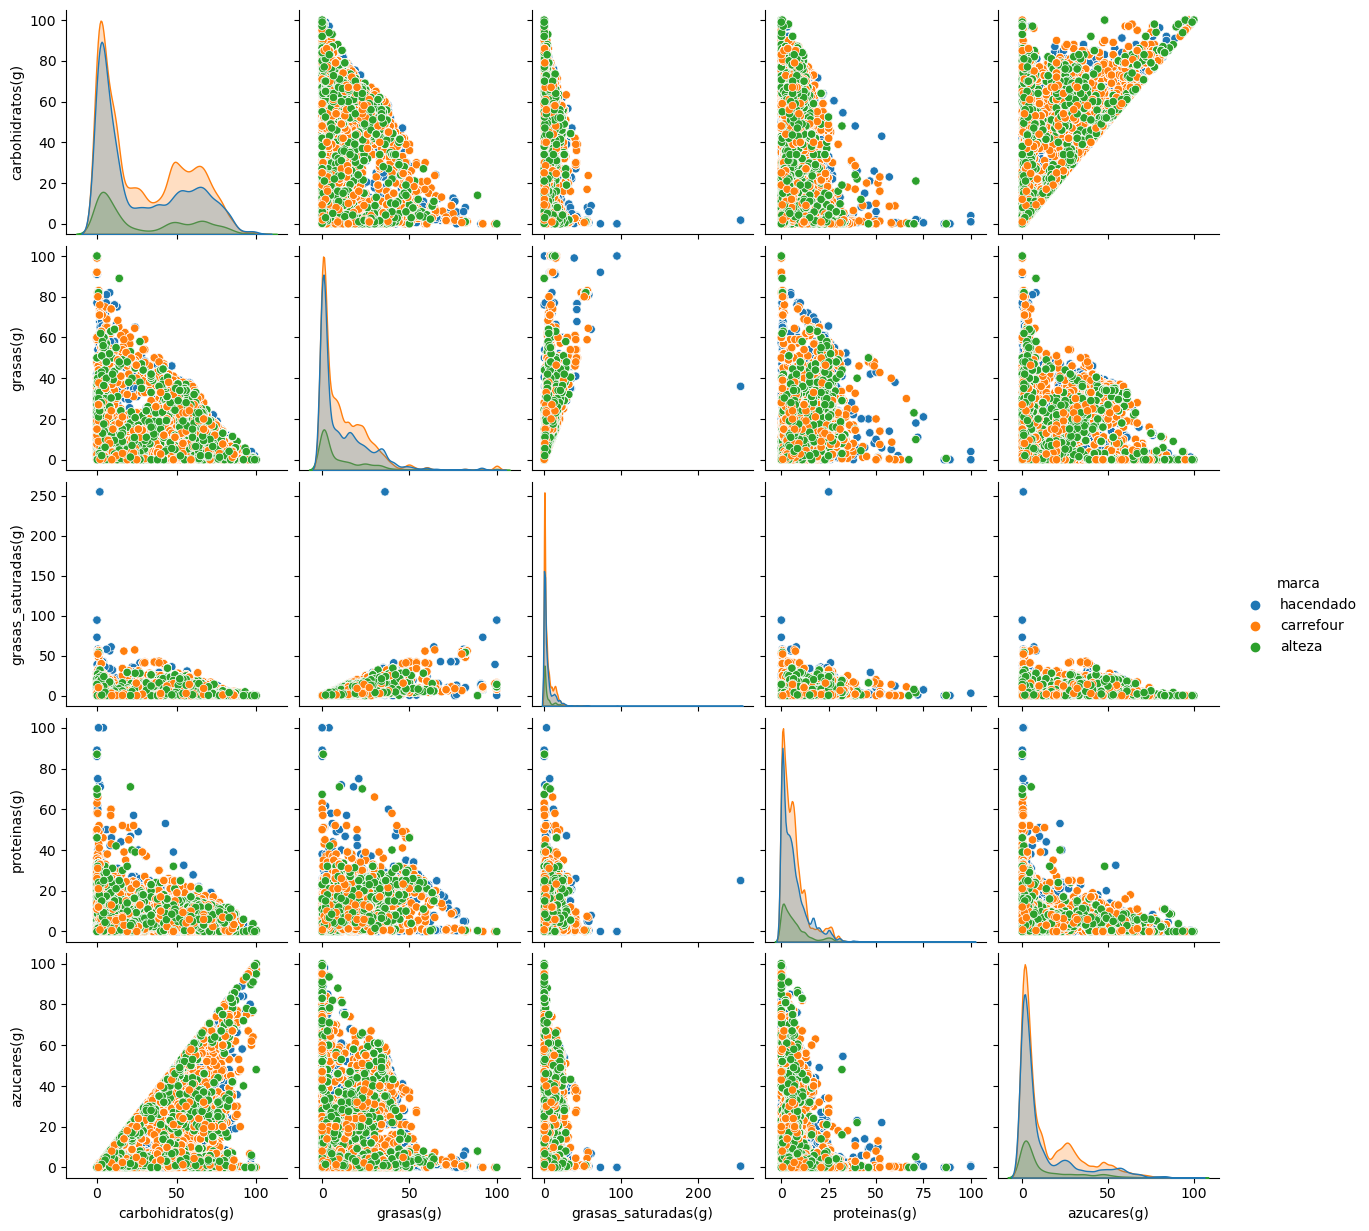

In [9]:
sns.pairplot(df_final1[["carbohidratos(g)","grasas(g)","grasas_saturadas(g)","proteinas(g)","azucares(g)","marca"]], hue = "marca")
plt.show()

In [11]:
df_final1.groupby("aditivos").count().sort_values("id_", ascending=False).head(5)

id_  nombre  marca  categoria  ingredientes  alergenos  \
aditivos                                                            
en:e330   9340    9314   9340       9269          9219       3799   
en:e322i  4747    4718   4747       4718          4730       4401   
en:e300   3709    3692   3709       3683          3646       1674   
en:e202   2831    2810   2831       2807          2778       1948   
en:e14xx  2603    2599   2603       2584          2592       2300   

          aceitedepalma  vegetariano  vegano  categoria_nutricional  ...  \
aditivos                                                             ...   
en:e330            9340         9340    9340                   8421  ...   
en:e322i           4747         4747    4747                   4585  ...   
en:e300            3709         3709    3709                   3551  ...   
en:e202            2831         2831    2831                   2704  ...   
en:e14xx           2603         2603    2603                   2491  ...   

          energy_kcal(kcal)  carbohidratos(g)  grasas(g)  grasas_saturadas(g)  \
aditivos                                                                        
en:e330                8978              9248       8866                 8754   
en:e322i               4549              4727       4727                 4720   
en:e300                3559              3669       3655                 3612   
en:e202                2709              2800       2796                 2796   
en:e14xx               2529              2546       2554                 2554   

          proteinas(g)  azucares(g)  sodio(g)  salt(g)  \
aditivos                                                 
en:e330           9200         9142      9087     9087   
en:e322i          4727         4720      4711     4711   
en:e300           3648         3639      3642     3642   
en:e202           2796         2800      2787     2787   
en:e14xx          2545         2554      2551     2551   

          fruits_vegetables_nuts_estimate_g(g)  fibra(g)  
aditivos                                                  
en:e330                                   9340      6608  
en:e322i                                  4747      4103  
en:e300                                   3709      2692  
en:e202                                   2831      1795  
en:e14xx                                  2603      1675  

[5 rows x 22 columns]

## Aditivos mas usados:
1. e330: Ácido Cítrico
    Acidulante natural o sintetico, regulardor de la acidez y saborizante.
    Usos : (Zumos, refrescos, tónicas, mostazas, productos sabor a limón).
    Efectos secundarios:  A largo plazo corrosión dental.
    Nivel de toxicidad: Baja
2. e322i: Lecitinas
    Antioxidante y emulsionante.
    Uso : Se utiliza en mayonesas y salsas, ademas de sprays antiadherentes.
    Efectos secundarios: Ninguno
    Nivel de toxicidad: Baja
3. e300: Ácido Ascórbico
    Antioxidante, (Es la misma vitamina C pero cuando se emplea como aditivo no puede ser referido como suplemento vitamínico.)
    Usos : (Panadería, bebidas, conservas enlatadas, embutidos… =
    Efectos secundarios: No se recomienda consumir más de 500 mg/día, puede provocar diarreas y cálculos renales
    Toxicidad: baja
4. e202: Sórbato de potasio
    Conservante
    Usos:Se utiliza en bolleria y productos cárnicos.
    Efectos secundarios: No se recomienda consumir mas de 10 mg/dia, por poder provocar diarreas y calculos renales. Un
   estudio en 2009 comprobó que la mezclarse con otras sustancias podria dar lugar a mutaciones geneticas.
    Toxicidad:Baja
5. e14xx: Almidón modificado
    Agente de textura
    Usos: Se usa en bolleria y zumos, etc.
    Efectos secundarios: Hiperactividad, malestares digestivos. En pruebas con animales arrastra restos calcáreos a los riñones    y las pelvis. Se investiga si puede causar el mismo efecto a largo plazo en humanos
    Nivel de toxicidad : Medio

In [13]:
px.histogram(data_frame = df_final1[(df_final1["aditivos"]=="en:e330")|(df_final1["aditivos"]=="en:e322i")|(df_final1["aditivos"]=="en:e300")|(df_final1["aditivos"]=="en:e202")|(df_final1["aditivos"]=="en:e14xx")],
             x          = "grasas(g)",
             y          = "proteinas(g)", 
             hover_data = ["aditivos"],
             color      = "aditivos",
             nbins      = 200,
             marginal   = "rug",
             facet_col  = "aditivos")

In [14]:
px.imshow(img = df_final1[["carbohidratos(g)","grasas(g)","grasas_saturadas(g)","proteinas(g)","azucares(g)",]].corr())

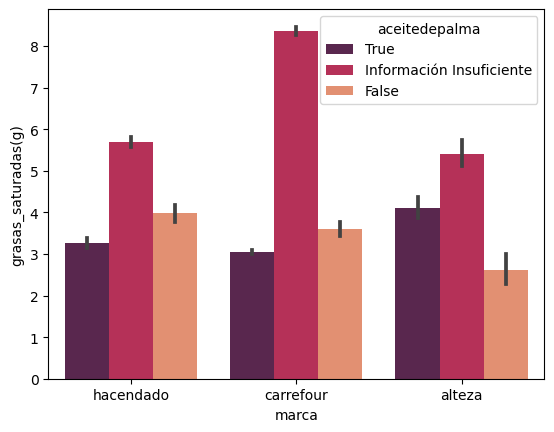

In [15]:
sns.barplot(x = "marca", y = "grasas_saturadas(g)", hue = "aceitedepalma", data = df_final1, palette = "rocket")
plt.show()

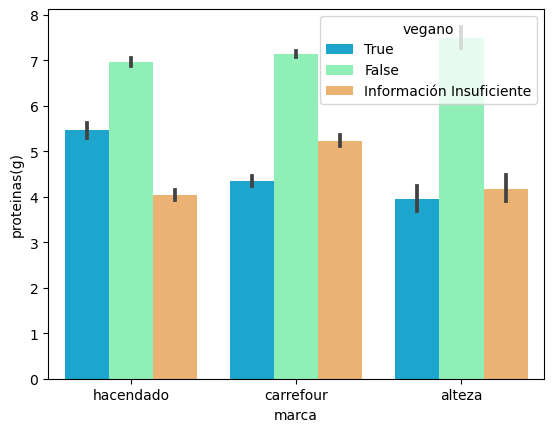

In [16]:
sns.barplot(x = "marca", y = "proteinas(g)", hue = "vegano", data = df_final1, palette = "rainbow")
plt.show()

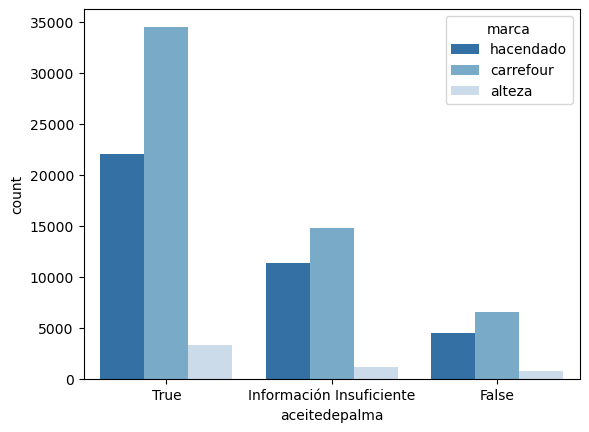

In [17]:
sns.countplot(x = "aceitedepalma", hue = "marca", data = df_final1, palette = "Blues_r")
plt.show()

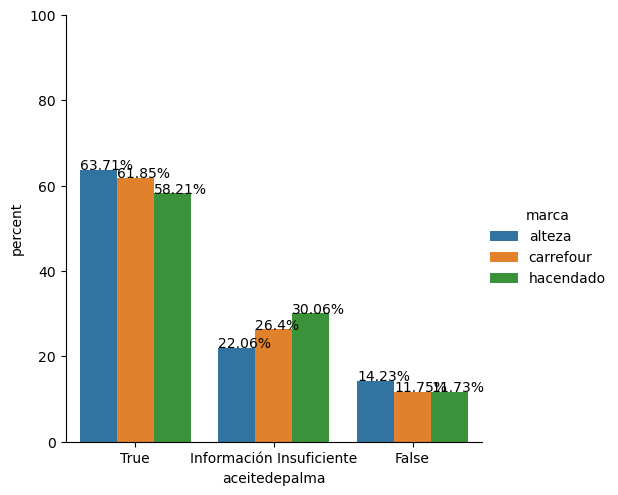

In [24]:
x,y = 'aceitedepalma', 'marca'

df1 = df_final1.groupby(y)[x].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.show()

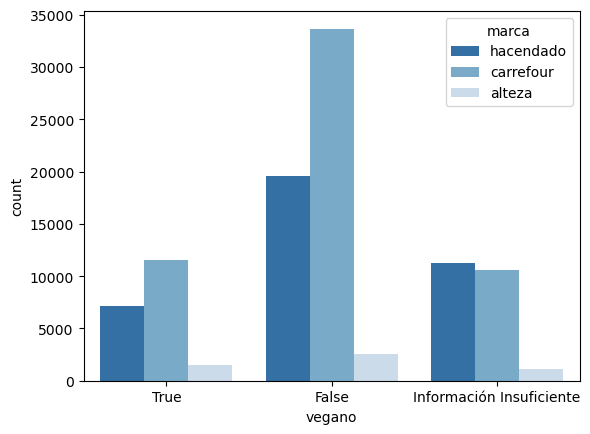

In [18]:
sns.countplot(x = "vegano", hue = "marca", data = df_final1, palette = "Blues_r")
plt.show()

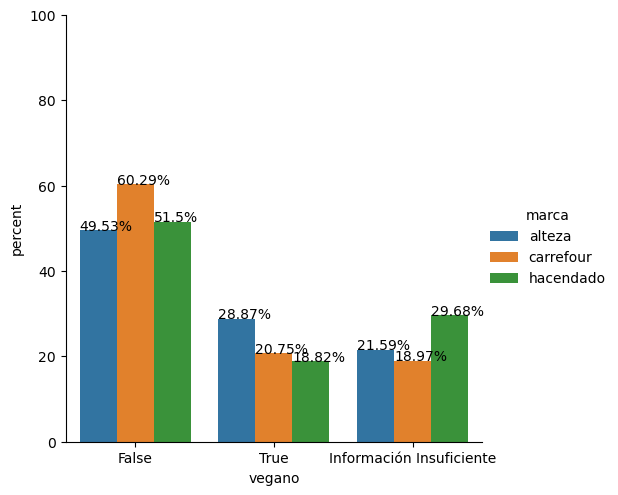

In [25]:
x,y = 'vegano', 'marca'

df1 = df_final1.groupby(y)[x].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.show()

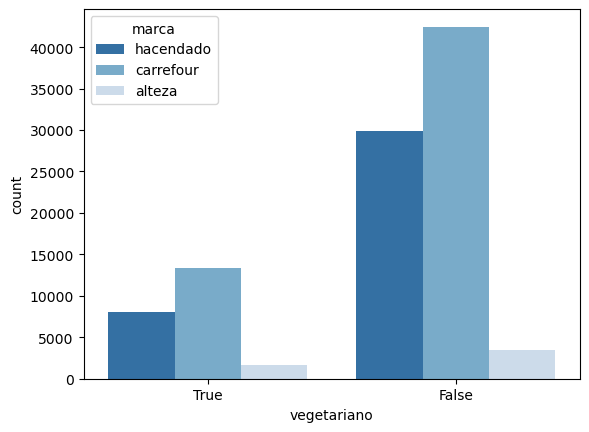

In [19]:
sns.countplot(x = "vegetariano", hue = "marca", data = df_final1, palette = "Blues_r")
plt.show()

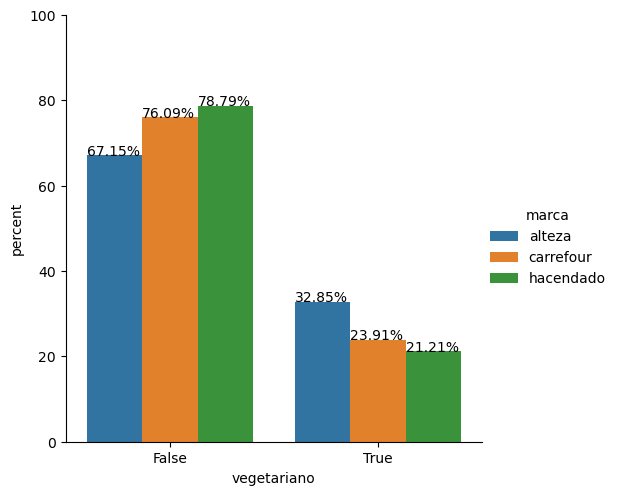

In [26]:
x,y = 'vegetariano', 'marca'

df1 = df_final1.groupby(y)[x].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.show()

In [21]:
px.treemap(data_frame = df_final1.dropna(subset = ["ecoscore", "tipo_procesado", "categoria_nutricional"]),
            values     = None,
            path       = ["marca", "categoria_nutricional", "tipo_procesado","ecoscore"],
            hover_name = "nombre",
            color      = "marca")

#### Categoria nutricional.
(A), muy saludable
(B), saludable
(C), ni bueno ni malo
(D), poco saludable
(E), no saludable
#### Ecoscore
El Eco-Score es un indicador medioambiental (ecoscore), con una puntuación de "A" a "E", con el cual se puede comparar fácilmente el impacto de los productos alimenticios sobre el medio ambiente.